In [2]:
import sys
sys.path.append("./../helper/") 
from common_imports import *
from helpers import *
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

### Load co-occurence counts

In [3]:
cc = counter('../counting/wos-econ-20k-titles-limited-cooc')

Loading ../counting/wos-econ-20k-titles-limited-cooc from disk...


In [4]:
len(cc.items('t'))

1500

### How surprising are co-occurrences given their marginal propsensities?

If terms are independent, their joint probability is $P(AB) = P(A)P(B)$. The ratio $\frac{P(AB)}{P(A)P(B)}$, therefore, is a good measure of surprisingness.

However, since we don't have probabilities but counts, we need to scale them by the total word count, $T$. Thus: 
$$\frac{\frac{C(AB)}{T}}{ \frac{C(A)}{T}\frac{C(B)}{T} } = \frac{C(AB)T}{C(A)C(B)}$$

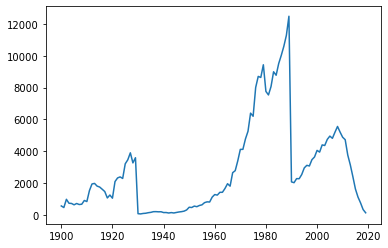

In [68]:
YS = range(1900,2020)
plt.plot(YS,
         [cc(fy=y) for y in YS]
);

### Calculate surprisingness ratio

In [5]:
min(cc.items('fy')), max(cc.items('fy'))

(1899, 2021)

In [6]:
YWINDOW = 20
YMIN = 1920
YMAX = 2020

In [7]:
cc.counts.keys()

dict_keys([('fy', 't'), ('fj', 't'), ('fy',), ('t',), ('fj',), ('t1', 't2'), ('fy', 't1', 't2')])

In [8]:
tot = cc.counts[('t',)].sum() # sum of counts across all terms
terms = cc.items('t') # all terms

In [9]:
def get_rat(t1, t2, yfrom, yto):
    ca = sum( cc(t=t1, fy=y) for y in range(yfrom, yto) ) # count of t1
    cb = sum( cc(t=t2, fy=y) for y in range(yfrom, yto) ) # count of t2
    cab = sum( cc(t1=t1, t2=t2, fy=y) for y in range(yfrom, yto) ) # count of them appearing together
    #print(t1,t2,ca,cb,cab)

    if cab < 3 or ca < 3 or cb < 3:
        return 0

    rat = tot * cab / (ca * cb) # surprise ratio
    return rat

In [10]:
[x for x,i in cc.ids['t'].items() if i==60 ]

['changes']

In [12]:
cc(t='change')

777

# temporal change in egonet

In [13]:
YMIN=1900

In [14]:
YMIN,YMAX,YWINDOW

(1900, 2020, 20)

In [57]:
focal = 'europe'
YWINDOW=5

from scipy.spatial.distance import cosine

rels_l = []
diffs = []
for YY in range(YMIN, YMAX, YWINDOW):
    #myrels = [ get_rat(focal, term, YY, YY+YWINDOW) for term in terms ]
    
    # this sort of analysis with just raw counts is not going to be effective...
    # it's not taking into account some words increasing in propensity across the board...
    # PMI makes a lot more sense.
    myrels = [ 
        sum( cc(t1=focal, t2=term, fy=y) for y in range(YY, YY+YWINDOW)) 
        for term in terms 
    ]
    myrels = np.array(myrels)
    myrels = np.log(myrels)
    myrels[myrels<=0] = 0
    
    if len(rels_l):
        diffs.append( cosine( rels_l[-1], myrels ) )
    
    rels_l.append(myrels)

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
c:\users\amcga\envs\citation-deaths\lib\site-packages\scipy\spatial\distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


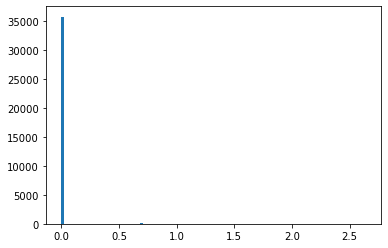

In [58]:
plt.hist(np.array(rels_l).flatten(), bins=100);

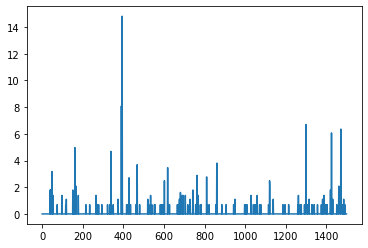

In [59]:
plt.plot(np.sum(np.array(rels_l), axis=0))

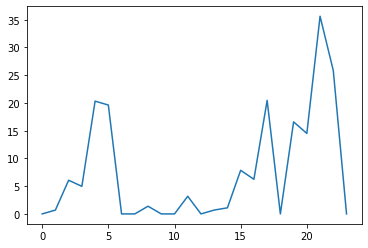

In [60]:
plt.plot(np.sum(np.array(rels_l), axis=1))

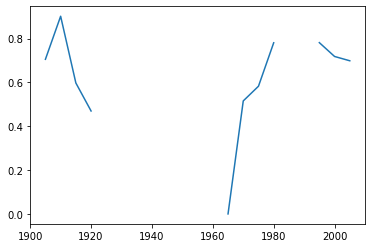

In [61]:
plt.plot(
    range(YMIN, YMAX-YWINDOW, YWINDOW), 
    diffs
)

In [62]:
(1980-YMIN)/YWINDOW

16.0

## which words changed the most in terms of counts

In [63]:
def norm(x):
    return np.power( (x**2).sum(), 0.5 )

In [64]:
wdiff = rels_l[17] / norm(rels_l[17]) - rels_l[16] / norm(rels_l[16])

for w in np.argsort(wdiff)[::-1][:10]:
    print(terms[w], wdiff[w])

eastern 0.407484822782196
economic 0.3152732951975244
economics 0.2498481751834338
japan 0.2498481751834338
unemployment 0.2498481751834338
century 0.1576366475987622
there 0.1576366475987622
comparative 0.1576366475987622
soviet 0.1576366475987622
politics 0.1576366475987622


In [65]:
for w in np.argsort(-wdiff)[::-1][:10]:
    print(terms[w], -wdiff[w])

critique 0.33333333333333337
analysis 0.33333333333333337
nation 0.33333333333333337
survey 0.33333333333333337
state 0.33333333333333337
with 0.33333333333333337
western 0.17569668573457117
united 0.08348515814989957
states 0.08348515814989957
exploratory -0.0
